In [24]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [25]:
(X_train,y_train),(X_test,y_test)= keras.datasets.mnist.load_data()

In [26]:
len(X_train)

60000

In [27]:
len(X_test)

10000

In [28]:
X_train[0].shape

(28, 28)

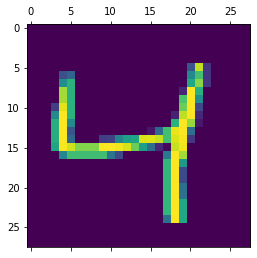

In [29]:
plt.matshow(X_train[2])

In [30]:
y_train[2]

4

In [31]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [32]:
X_train.shape

(60000, 28, 28)

In [33]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [34]:
X_train=X_train/255
X_test=X_test/255

In [35]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [36]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [37]:
X_test_flattened.shape

(10000, 784)

In [38]:
model= keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer= 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 473us/step - loss: 0.4839 - accuracy: 0.8793
Epoch 2/5
1875/1875 [==============================] - 1s 481us/step - loss: 0.3063 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 1s 483us/step - loss: 0.2850 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 1s 475us/step - loss: 0.2746 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 1s 457us/step - loss: 0.2675 - accuracy: 0.9266


In [39]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 338us/step - loss: 0.2645 - accuracy: 0.9263


[0.2645075023174286, 0.9262999892234802]

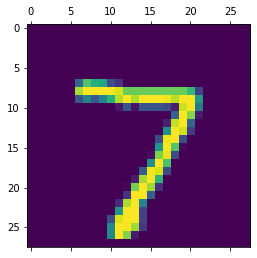

In [40]:
plt.matshow(X_test[0])

In [41]:
y_predicted=model.predict(X_test_flattened)

In [42]:
y_predicted[0]

array([1.36140698e-05, 1.44547152e-10, 4.44204961e-05, 1.00547075e-02,
       1.19290030e-06, 6.86380663e-05, 9.87032012e-10, 6.94398224e-01,
       6.09532544e-05, 1.06054544e-03], dtype=float32)

In [43]:
np.argmax(y_predicted[0])

7

In [46]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [48]:
cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [49]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   8,    9,  926,   15,    7,    4,   13,   10,   35,    5],
       [   3,    0,   20,  925,    1,   20,    2,    8,   22,    9],
       [   2,    1,    4,    1,  908,    0,   10,    4,    9,   43],
       [   9,    3,    2,   32,   10,  776,   15,    4,   33,    8],
       [  13,    3,    7,    1,    8,   12,  909,    2,    3,    0],
       [   1,    7,   26,    7,   10,    0,    0,  933,    1,   43],
       [   7,    7,    6,   24,    9,   24,    8,    9,  869,   11],
       [  10,    7,    1,   11,   17,    6,    0,   10,    8,  939]])>

Text(69.0, 0.5, 'Truth')

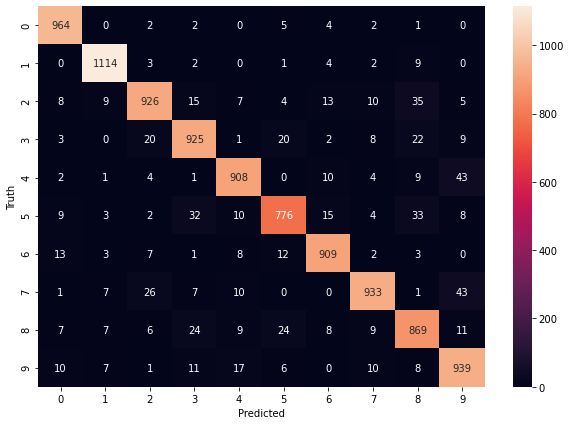

In [51]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
model= keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 758us/step - loss: 0.2919 - accuracy: 0.9176
Epoch 2/5
1875/1875 [==============================] - 1s 663us/step - loss: 0.1392 - accuracy: 0.9591
Epoch 3/5
1875/1875 [==============================] - 1s 691us/step - loss: 0.0980 - accuracy: 0.9710
Epoch 4/5
1875/1875 [==============================] - 1s 672us/step - loss: 0.0780 - accuracy: 0.9764
Epoch 5/5
1875/1875 [==============================] - 1s 670us/step - loss: 0.0626 - accuracy: 0.9810


In [59]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 476us/step - loss: 0.0905 - accuracy: 0.9730


[0.09047344326972961, 0.9729999899864197]

Text(69.0, 0.5, 'Truth')

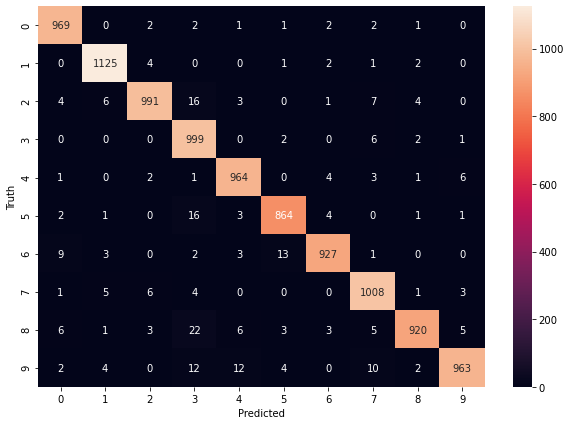

In [61]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels= [np.argmax(i) for i in y_predicted]

cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [1]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

NameError: name 'keras' is not defined